# Maana Q: Knowledge and Reasoning Platform

## Installation

In [33]:
using Pkg
Pkg.add("TikzGraphs")
Pkg.add("LightGraphs")

  Resolving package versions...
No Changes to `~/src/muziq/CatML.jl/Project.toml`
No Changes to `~/src/muziq/CatML.jl/Manifest.toml`
  Resolving package versions...
No Changes to `~/src/muziq/CatML.jl/Project.toml`
No Changes to `~/src/muziq/CatML.jl/Manifest.toml`


## Applied Category Theory using GATs

### Two views on category theory and software [^Patterson1]

1. Designing with categories: CT informing the design, architecture, and implementation of computer programs, in any domain.

**Slogan**: *Design patterns, but better*

2. Computing on categories: data structures and algorithms for computing with objects and morphisms in categories.

**Slogan**: *Computer algebra of categories* or *computational category theory*

**These are orthogonal [and can be layered].**

!!! tip
	This notebook is about how to use Q for computational category theory (mostly).

[^Patterson1]: [Evan Patterson: Realizing Applied Category Theory in Julia](https://www.youtube.com/watch?v=7dmrDYQh4rc)

### Representing morphisms in monoidal categories

Transforming between different **computational representations** of morphisms in symmetric monoidal categories.

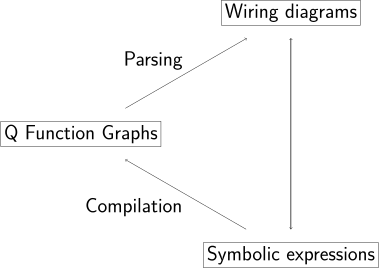

In [2]:
using TikzGraphs
using LightGraphs
g = DiGraph(3)
add_edge!(g, 1, 2)
add_edge!(g, 2, 1)
add_edge!(g, 2, 3)
add_edge!(g, 3, 1)
TikzGraphs.plot(g, node_style="draw", options="scale=2, font=\\huge\\sf", TikzGraphs.Layouts.SpringElectrical(charge=25,dist=35), ["Wiring diagrams", "Symbolic expressions", "Q Function Graphs"], edge_labels=Dict((2,3)=>"Compilation", (3,1)=>"Parsing"))

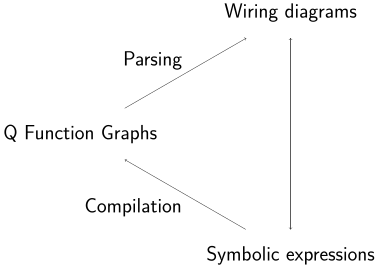

In [6]:
gg = DiGraph(3)
add_edge!(gg, 1, 2)
add_edge!(gg, 2, 1)
add_edge!(gg, 2, 3)
add_edge!(gg, 3, 1)
TikzGraphs.plot(gg, node_style="", options="scale=2, font=\\huge\\sf", TikzGraphs.Layouts.SpringElectrical(charge=25,dist=35), ["Wiring diagrams", "Symbolic expressions", "Q Function Graphs"], edge_labels=Dict((2,3)=>"Compilation", (3,1)=>"Parsing"), edge_style="")

## Theories and Signatures

An algebraic structure consists of 3 things:

1. **Sorts**: what "sort" of things is it about
1. **Operations**: what "actions" can be taken on the sorts
1. **Equations**: what "laws" must hold for the use of the operations on the sorts

A **signature** is the pairing of sorts and operations.  A **theory** is a pairing of the signature and the equations.

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/theory-signature.png)

## Theory: `Category`

* **Service URI**: `/maana-cat-category`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-theory.png)

### Equation: `isAssociative`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-is-associative.png)

### Equation: `isUnital`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-is-unital.png)

## Theory: `Monoid`

* **Service URI**: `/maana-cat-monoid`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-theory.png)

### Equation: `isAssociative`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-is-associative.png)

### Equation: `isUnital`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-is-unital.png)

## Algebraic Theory Instances

### Smart CRUD

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/theory-smart-crud.png)

### Graph*i*QL

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/algebraic-instance-graphiql.png)

### GraphQL

```graphql
mutation persist($theorys: [TheoryAsInput]) {
  persistTheorys(theorys: $theorys)
}

fragment theoryFields on Theory {
  id
  signature {
    ...signatureFields
  }
  equations {
    ...equationFields
  }
}

fragment signatureFields on Signature {
  id
  sorts {
    id
  }
  operations {
    id
  }
}

fragment equationFields on Equation {
  id
}

query get {
  allTheorys {
    ...theoryFields
  }
}
```

### JSON

```json
{"theorys":[{
    "id": "/maana-cat-monoid", 
    "signature": {
      "id": "/maana-cat-monoid", 
      "sorts": [
        {"id": "/maana-cat-monoid/kind/M"}
      ], 
      "operations": [
        {"id": "/maana-cat-monoid/fn/e"},
        {"id": "/maana-cat-monoid/fn/m"}
      ]},
    "equations": [
      {"id": "/maana-cat-monoid/fn/isAssociative"},
      {"id": "/maana-cat-monoid/fn/isUnital"},
      {"id": "/maana-cat-monoid/fn/isEqual"}
    ]
},{
    "id": "/maana-cat-category", 
    "signature": {
      "id": "/maana-cat-category", 
      "sorts": [
        {"id": "/maana-cat-category/kind/Ob"},
        {"id": "/maana-cat-category/kind/Hom"}
      ], 
      "operations": [
        {"id": "/maana-cat-category/fn/id"},
        {"id": "/maana-cat-category/fn/compose"},
        {"id": "/maana-cat-category/fn/apply"}
      ]},
    "equations": [
      {"id": "/maana-cat-category/fn/isAssociative"},
      {"id": "/maana-cat-category/fn/isUnital"},
      {"id": "/maana-cat-category/fn/isEqual"}
    ]
}]}
```

In [ ]:
### Theory DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/theory-dataview.png)

In [ ]:
### Signature DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/signature-dataview.png)

In [ ]:
### Equation DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/equation-dataview.png)

In [ ]:
### Sort DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/sort-dataview.png)

In [ ]:
### Operation DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/operation-dataview.png)